# Неделя 1

In [26]:
import pandas as pd
data = pd.read_csv(r'C:\Users\snkna\Downloads\titanic.csv', index_col='PassengerId')
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Какое количество мужчин и женщин ехало на корабле? В качестве ответа приведите два числа через пробел.

In [2]:
male_count = data[data.Sex=='male'].shape[0]
female_count = data[data.Sex=='female'].shape[0]
print(male_count, female_count)

with open("Intro_Pandas.1.txt", "w") as file:
    file.write("%d %d" % (male_count, female_count))

577 314


Какой части пассажиров удалось выжить? Посчитайте долю выживших пассажиров. Ответ приведите в процентах (число в интервале от 0 до 100, знак процента не нужен), округлив до двух знаков.

In [3]:
survaved_percent = round(data[data.Survived==1].shape[0]/data.shape[0]*100,2)
with open("Intro_Pandas.2.txt", "w") as file:
    file.write("%.2f" % survaved_percent)
survaved_percent


38.38

Какую долю пассажиры первого класса составляли среди всех пассажиров? Ответ приведите в процентах (число в интервале от 0 до 100, знак процента не нужен), округлив до двух знаков.

In [4]:
first_class = round(data[data.Pclass==1].shape[0]/data.shape[0]*100,2)
with open("Intro_Pandas.3.txt", "w") as file:
    file.write("%.2f" % first_class)
first_class

24.24

Какого возраста были пассажиры? Посчитайте среднее и медиану возраста пассажиров. В качестве ответа приведите два числа через пробел.

In [5]:
print(data.Age.mean(),data.Age.median())
with open("Intro_Pandas.4.txt", "w") as file:
    file.write("%.2f %d" % (data.Age.mean(), data.Age.median()))

29.69911764705882 28.0


Коррелируют ли число братьев/сестер/супругов с числом родителей/детей? Посчитайте корреляцию Пирсона между признаками SibSp и Parch.

In [6]:
data['SibSp'].corr(data['Parch'])
with open("Intro_Pandas.5.txt", "w") as file:
    file.write("%.2f" % data['SibSp'].corr(data['Parch']))

Какое самое популярное женское имя на корабле? Извлеките из полного имени пассажира (колонка Name) его личное имя (First Name). Это задание — типичный пример того, с чем сталкивается специалист по анализу данных. Данные очень разнородные и шумные, но из них требуется извлечь необходимую информацию. Попробуйте вручную разобрать несколько значений столбца Name и выработать правило для извлечения имен, а также разделения их на женские и мужские.
Если ответом является нецелое число, то целую и дробную часть необходимо разграничивать точкой, например, 0.42. При необходимости округляйте дробную часть до двух знаков.

In [7]:
import re
def clean_name(name):
 
    # Первое слово до запятой - фамилия
    s = re.search('^[^,]+, (.*)', name)
    if s:
        name = s.group(1)
 
    # Если есть скобки - то имя пассажира в них
    s = re.search('\(([^)]+)\)', name)
    if s:
        name = s.group(1)
    # Удаляем обращения
    name = re.sub('(Miss\. |Mrs\. |Ms\. )', '', name)
    # Берем первое оставшееся слово и удаляем кавычки
    name = name.split(' ')[0].replace('"', '')
    return name
 
names = data[data['Sex'] == 'female']['Name'].map(clean_name)
name_counts = names.value_counts()
 
print(6, name_counts.head(1).index.values[0])

6 Mary


In [9]:
data.loc[data['Sex'] == 'female','Name'].str.split('.').str[1].str.split('(').str[::-1].str[0].str.replace(r'$[ ]+', '').str.split(' ').str[1].mode()

0    Mary
dtype: object

In [10]:
with open("Intro_Pandas.6.txt", "w") as file:
    file.write("%s" % data.loc[data['Sex'] == 'female','Name'].str.split('.').str[1].str.split('(').str[::-1].str[0].str.replace(r'$[ ]+', '').str.split(' ').str[1].mode()[0])

In [62]:
data_selected_1 = data[['Pclass','Fare','Age','Sex','Survived']].dropna(axis=0)

data_selected_1_X = data_selected_1[['Pclass','Fare','Age','Sex']]
data_selected_1_Y = data_selected_1[['Survived']]
data_selected_1_X = pd.get_dummies(data_selected_1_X, columns=['Sex'],prefix='',drop_first=True)
data_selected_1_X.rename(columns={'_male':'Sex'},inplace=True)

In [63]:
data_selected_1_X

,Pclass,Fare,Age,Sex
PassengerId,,,,
1,3,7.2500,22.0,1
2,1,71.2833,38.0,0
3,3,7.9250,26.0,0
4,1,53.1000,35.0,0
5,3,8.0500,35.0,1
...,...,...,...,...
886,3,29.1250,39.0,0
887,2,13.0000,27.0,1
888,1,30.0000,19.0,0


In [64]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=241)
clf.fit(data_selected_1_X, data_selected_1_Y)
clf.feature_importances_

array([0.14000522, 0.30343647, 0.2560461 , 0.30051221])

In [65]:
data_selected_1_X.columns

Index(['Pclass', 'Fare', 'Age', 'Sex'], dtype='object')

In [69]:
df_result_feature_importances = pd.DataFrame(columns=['Col','Imp'])
k=0
for i,j in zip(list(clf.feature_importances_),list(data_selected_1_X.columns)):
    df_result_feature_importances.loc[k,'Imp'] = i
    df_result_feature_importances.loc[k,'Col'] = j
    k+=1
df_result_feature_importances = df_result_feature_importances.sort_values(by='Imp',ascending=False)
data_for_answer = list(df_result_feature_importances.iloc[:2,0])
data_for_answer

['Fare', 'Sex']

In [70]:
with open("Decision_trees.1.txt", "w") as file:
    file.write("%s %s" % (data_for_answer[0], data_for_answer[1]))

# Неделя 2 Метрические методы классификации

#### Задача1

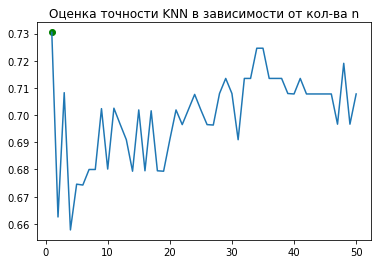

1 0.7304761904761905


In [54]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
%matplotlib inline

# Загрузите выборку Wine по адресу https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
data5 = pd.read_csv(r'C:\Users\snkna\Downloads\wine.data',header=None)
# Извлеките из данных признаки и классы. Класс записан в первом столбце (три варианта), признаки — в столбцах со второго по последний.
# Более подробно о сути признаков можно прочитать по адресу https://archive.ics.uci.edu/ml/datasets/Wine
y = data5.iloc[:,0]
X = data5.iloc[:,1:]

#Оценку качества необходимо провести методом кросс-валидации по 5 блокам (5-fold). 
# Создайте генератор разбиений, который перемешивает выборку перед формированием блоков (shuffle=True). 
# Для воспроизводимости результата, создавайте генератор KFold с фиксированным параметром random_state=42.
# В качестве меры качества используйте долю верных ответов (accuracy).
# Найдите точность классификации на кросс-валидации для метода k ближайших соседей при k от 1 до 50. 
# При каком k получилось оптимальное качество? Чему оно равно (число в интервале от 0 до 1)?

def find_opt_k(X,y,file_name1,file_name2):
    kf = KFold(n_splits=5,shuffle=True,random_state=42)
    scores = []
    for k in  range(1,51):
        neigh = KNeighborsClassifier(n_neighbors=k)
        scores.append(cross_val_score(neigh, X, y, cv=kf).mean())
        
        
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(np.arange(1,51),scores)
    plt.scatter(np.argmax(scores)+1,scores[np.argmax(scores)],color='g')
    plt.title('Оценка точности KNN в зависимости от кол-ва n')
    plt.show()
    print(np.argmax(scores)+1,scores[np.argmax(scores)])
    with open(file_name1, "w") as file:
        file.write("%d" % (np.argmax(scores)))
    with open(file_name2, "w") as file:
        file.write("%.2f" % scores[np.argmax(scores)])
        
find_opt_k(X,y,"statement_neighbours_1","statement_neighbours_2")

Cкорее всего оптимальное k=1 означает что метод плохо работает на имеющихся признаках.
Метод угадывает правильный ответ в более чем половине случаев. Можно ли получить большее качество за счет приведения признаков к одному масштабу?

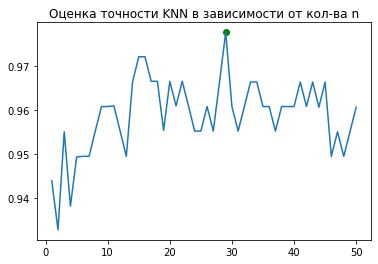

29 0.9776190476190475


In [258]:
# Произведите масштабирование признаков с помощью функции sklearn.preprocessing.scale. 
# Снова найдите оптимальное k на кросс-валидации и усредненное значение точности

from sklearn import preprocessing
X_scaled = preprocessing.scale(X)
find_opt_k(X_scaled,y,"statement_neighbours_3","statement_neighbours_4")

Оптимальное качество достигается при k > 1. Это гораздо более логичный результат, чем до масштабирования.
Результат существенно превосходит качество, полученное без масштабирования признаков.

#### Задача2

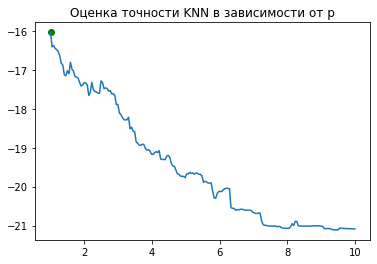

1 -16.030646734221644


In [250]:
from sklearn.datasets import load_boston
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

# Загрузите выборку Boston
boston = load_boston()
x = pd.DataFrame(boston.data)
x.columns = boston.feature_names
y=pd.DataFrame(boston.target)
# y.columns=['TARGET']
y = np.array(y).ravel()

# Приведите признаки в выборке к одному масштабу при помощи функции sklearn.preprocessing.scale
X_scaled = preprocessing.scale(x)

# Переберите варианты параметра метрики p по сетке от 1 до 10 с таким шагом, чтобы всего было протестировано 200 вариантов.
# Используйте KNeighborsRegressor с n_neighbors=5 и weights='distance' — данный параметр добавляет в алгоритм веса, 
# зависящие от расстояния до ближайших соседей.
# В качестве метрики качества используйте среднеквадратичную ошибку (параметр scoring='mean_squared_error' у cross_val_score; 
# при использовании библиотеки scikit-learn версии 0.18.1 и выше необходимо указывать scoring='neg_mean_squared_error'). 
# Качество оценивайте с помощью кросс-валидации по 5 блокам с random_state = 42, включить перемешивание выборки (shuffle=True)

kf = KFold(n_splits=5,shuffle=True,random_state=42)
scores = []
for p in  np.linspace(1,10,200):
    neigh = KNeighborsRegressor(n_neighbors=5,weights='distance',p=p, metric='minkowski')
    scores.append(cross_val_score(neigh, X_scaled, y, cv=kf, scoring='neg_mean_squared_error').mean())
fig = plt.figure()
ax = plt.axes()
ax.plot(np.linspace(1,10,200),scores)
#Определите, при каком p качество на кросс-валидации оказалось оптимальным.
plt.scatter(np.linspace(1,10,200)[np.argmax(scores)],scores[np.argmax(scores)],color='g')
plt.title('Оценка точности KNN в зависимости от p')
plt.show()
print(np.linspace(1,10,200)[np.argmax(scores)],scores[np.argmax(scores)])

with open('statement_metrics_tuning', "w") as file:
        file.write("%d" % (np.linspace(1,10,200)[np.argmax(scores)]))       
        



Евклидова метрика (p=2) — не самый лучший вариант для этой задачи!

#### Задача3

In [43]:
# Загрузите обучающую и тестовую выборки из файлов perceptron-train.csv и perceptron-test.csv.
# Целевая переменная записана в первом столбце, признаки — во втором и третьем.
import pandas as pd
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

data6 = pd.read_csv(r'C:\Users\snkna\Downloads\perceptron-train.csv',header=None)
data7 = pd.read_csv(r'C:\Users\snkna\Downloads\perceptron-test.csv',header=None)
y_train = data6[0]
X_train = data6.iloc[:,1:3]

y_test = data7[0]
X_test = data7.iloc[:,1:3]



# Обучите персептрон со стандартными параметрами и random_state=241
clf = Perceptron()
clf.fit(X_train, y_train)
# Подсчитайте качество (долю правильно классифицированных объектов, accuracy) полученного классификатора на тестовой выборке.
acc1 = accuracy_score(y_test,clf.predict(X_test))

# Нормализуйте обучающую и тестовую выборку с помощью класса StandardScaler.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучите персептрон на новой выборке. Найдите долю правильных ответов на тестовой выборке.

# Обучите персептрон со стандартными параметрами и random_state=241
clf2 = Perceptron()
clf2.fit(X_train_scaled, y_train)

# Подсчитайте качество (долю правильно классифицированных объектов, accuracy) полученного классификатора на тестовой выборке.
acc2 = accuracy_score(y_test,clf2.predict(X_test_scaled))

# Найдите разность между качеством на тестовой выборке после нормализации и качеством до нее.
result = acc2-acc1
print(result)

with open("statement_linear.1.txt", "w") as file:
    file.write("%.3f" %  result)

0.18999999999999995


Нормализация данных дает значительный прирост в качестве — оно увеличивается на 19%.

# Неделя 3 Метод опорных векторов
#### Задача1

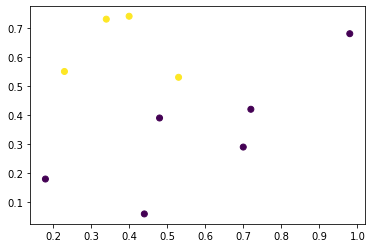

In [416]:
from sklearn.svm import SVC
import pandas as pd

# Загрузите выборку из файла svm-data.csv. 
# В нем записана двумерная выборка (целевая переменная указана в первом столбце, признаки — во втором и третьем).
data53 = pd.read_csv(r'C:\Users\snkna\Downloads\svm-data.csv',header=None)
y = data53[0]
X = data53.iloc[:,1:3]

# Обучите классификатор с линейным ядром, параметром C = 100000 и random_state=241. 
# Такое значение параметра нужно использовать, чтобы убедиться, что SVM работает с выборкой как с линейно разделимой. 
# При более низких значениях параметра алгоритм будет настраиваться с учетом слагаемого в функционале, 
# штрафующего за маленькие отступы, из-за чего результат может не совпасть с решением классической задачи 
# SVM для линейно разделимой выборки.

svm = SVC(kernel='linear',C = 100000, random_state=241)
svm.fit(X_train,y_train)
output = ' '.join([str(i) for i in list(svm.support_+1)])

with open('statement_svm_1', "w") as file:
        file.write("%s" % output) 

labels = colors = y_train
plt.scatter(X_train[1],X_train[2],c=colors)

Опорными являются три объекта этой выборки.

#### Задача2

In [140]:
# Загрузите объекты из новостного датасета 20 newsgroups, относящиеся к категориям "космос" и "атеизм"
from sklearn import datasets

newsgroups = datasets.fetch_20newsgroups(
                    subset='all', 
                    categories=['alt.atheism', 'sci.space']
             )
X = newsgroups.data
y = newsgroups.target

# Вычислите TF-IDF-признаки для всех текстов. Обратите внимание, что в этом задании мы предлагаем вам вычислить TF-IDF по всем данным. 
# При таком подходе получается, что признаки на обучающем множестве используют информацию из тестовой выборки — но такая ситуация 
# вполне законна, поскольку мы не используем значения целевой переменной из теста. На практике нередко встречаются ситуации,
# когда признаки объектов тестовой выборки известны на момент обучения, и поэтому можно ими пользоваться при обучении алгоритма

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_text = vectorizer.fit_transform(X)

#Подберите минимальный лучший параметр C из множества [10^-5, 10^-4, ... 10^4, 10^5] для SVM с линейным ядром (kernel='linear') 
#при помощи кросс-валидации по 5 блокам. Укажите параметр random_state=241 и для SVM, и для KFold. 
#В качестве меры качества используйте долю верных ответов (accuracy)

from sklearn.svm import SVC
from sklearn.model_selection import KFold,GridSearchCV
import numpy as np
import pandas as pd


C_grid = {'C': np.power(10.0, np.arange(-5, 6))}
kf = KFold(n_splits=5, shuffle=True, random_state=241)
clf = SVC(kernel='linear', random_state=241)
gs = GridSearchCV(estimator=clf, param_grid=C_grid, scoring='accuracy', cv=kf,refit=True, n_jobs=-1)
gs.fit(X_train_text, y)
df = pd.DataFrame(gs.cv_results_['param_C'].data,gs.cv_results_['mean_test_score'])
print('best_C',df.iloc[np.argmax(df.sort_index().index),0])
final_clf = gs.best_estimator_
# Найдите 10 слов с наибольшим абсолютным значением веса (веса хранятся в поле coef_ у svm.SVC).
# Они являются ответом на это задание. Укажите эти слова через запятую или пробел, в нижнем регистре, 
# в лексикографическом порядке.
top10idx = np.array(final_clf.coef_.indices)[np.abs(np.array(final_clf.coef_.data)).argsort()[-10:]]
words = vectorizer.get_feature_names()
output = ' '.join([str(i) for i in sorted([words[i] for i in top10idx])])
print(output)
with open('statement_svm_2', "w") as file:
        file.write("%s" % output) 

best_C 1.0
atheism atheists bible god keith moon religion sci sky space


# Неделя 3 Логистическая регрессия
#### Задача1

In [343]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score


# Загрузите данные из файла data-logistic.csv. Это двумерная выборка, целевая переменная на которой принимает значения -1 или 1.
data37 = pd.read_csv(r'C:\Users\snkna\Downloads\data-logistic.csv',header=None)
y_train = data37[0]
X_train = data37.iloc[:,1:3]

# Реализуйте градиентный спуск для обычной и L2-регуляризованной (с коэффициентом регуляризации 10) логистической регрессии. 
# Используйте длину шага k=0.1. В качестве начального приближения используйте вектор (0, 0).
def grad_step(x,y,w1,w2,C,k=0.1):
    l = x.shape[0]
#     for i in range(l):
    summ1 = np.sum((x[1]*y)*(1-1/(1+np.exp(-y*(w1*x[1]+w2*x[2])))))
    summ2 = np.sum((x[2]*y)*(1-1/(1+np.exp(-y*(w1*x[1]+w2*x[2])))))
    w1 = w1 + k*1/l* summ1 - k*C*w1
    w2 = w2 + k*1/l* summ2 - k*C*w2
    return w1,w2

# Запустите градиентный спуск и доведите до сходимости 
# (евклидово расстояние между векторами весов на соседних итерациях должно быть не больше 1e-5).
# Рекомендуется ограничить сверху число итераций десятью тысячами.

def log_reg (X,y,C,w1,w2):
    for i in range (100000):
        w1_start,w2_start = w1,w2
        w1,w2 = grad_step(X,y,w1_start,w2_start,C,k=0.1)
        if ( np.sqrt( (w1_start-w1)**2 + (w2_start-w2)**2 ) <= 1e-5 ): # евклидово расстояние между векторами
            break
    return w1,w2,i

# Какое значение принимает AUC-ROC на обучении без регуляризации и при ее использовании? 
# Эти величины будут ответом на задание. В качестве ответа приведите два числа через пробел. 
# Обратите внимание, что на вход функции roc_auc_score нужно подавать оценки вероятностей, 
# подсчитанные обученным алгоритмом. Для этого воспользуйтесь сигмоидной функцией: a(x) = 1 / (1 + exp(-w1 x1 - w2 x2)).

def predictions(w1,w2,x):
    return 1 / (1 + np.exp(-w1*x[1] - w2*x[2]))

w1,w2,num = log_reg(X_train,y_train,w1=0,w2=0,C=0)
print(w1, w2,num)
w1_L2,w2_L2,num_L2 = log_reg(X_train,y_train,w1=0,w2=0,C=10)
print(w1_L2,w2_L2,num_L2)


answ1 = roc_auc_score(y_train,predictions(w1,w2,X_train))
answ2 = roc_auc_score(y_train,predictions(w1_L2,w2_L2,X_train))
print("%.3f %.3f" % (answ1,answ2))
print('Качество классификатора при использовании регуляризации выше, чем без нее.')

with open('statement_logistic_1', "w") as file:
        file.write("%.3f %.3f" % (answ1,answ2))

0.28781162047177644 0.09198330215925436 243
0.02855875454623421 0.024780137249735552 7
0.927 0.936
Качество классификатора при использовании регуляризации выше, чем без нее.


# Неделя 3 Метрики качества
#### Задача1

In [407]:
# Загрузите файл classification.csv. В нем записаны истинные классы объектов выборки (колонка true) и ответы 
# некоторого классификатора (колонка pred).
data38 = pd.read_csv(r'C:\Users\snkna\Downloads\classification.csv')
# y_train = data37[0]
# X_train = data37.iloc[:,1:3]
data38

# подсчитайте величины TP, FP, FN и TN 
TP = data38[(data38['true']==1)&(data38['pred']==1)].shape[0]
FP = data38[(data38['true']==0)&(data38['pred']==1)].shape[0]
TN = data38[(data38['true']==0)&(data38['pred']==0)].shape[0]
FN = data38[(data38['true']==1)&(data38['pred']==0)].shape[0]

print((TP,FP,FN,TN))

with open('statement_metrics_1', "w") as file:
    file.write("%d %d %d %d" % (TP,FP,FN,TN))
    
# Посчитайте основные метрики качества классификатора
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

hand_acc = (TP+TN)/(TP+TN+FN+FP)
lb_acc = accuracy_score(data38['true'],data38['pred'])
print(" %.2f" %hand_acc,hand_acc==lb_acc)

hand_precision = TP/(TP+FP)
lb_precision = precision_score(data38['true'],data38['pred'])
print(" %.2f" %hand_precision,hand_precision==lb_precision)

hand_recall = TP/(TP+FN)
lb_recall = recall_score(data38['true'],data38['pred'])
print(" %.2f" %lb_recall,hand_recall==lb_recall)


hand_F1 = 2 * (hand_precision * hand_recall) / (hand_precision + hand_recall)
lb_F1 = f1_score(data38['true'],data38['pred'])
print(" %.2f" %hand_F1,hand_F1==lb_F1)

#В качестве ответа укажите эти четыре числа через пробел
with open('statement_metrics_2', "w") as file:
    file.write("%.2f %.2f %.2f %.2f" % (lb_acc,lb_precision,lb_recall,lb_F1))
    
# Имеется четыре обученных классификатора. В файле scores.csv записаны истинные классы 
# и значения степени принадлежности положительному классу для каждого классификатора на некоторой выборке
# для логистической регрессии — вероятность положительного класса (колонка score_logreg),
# для SVM — отступ от разделяющей поверхности (колонка score_svm),
# для метрического алгоритма — взвешенная сумма классов соседей (колонка score_knn),
# для решающего дерева — доля положительных объектов в листе (колонка score_tree).

from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

data_39  = pd.read_csv(r'C:\Users\snkna\Downloads\scores.csv')

# Посчитайте площадь под ROC-кривой для каждого классификатора.
# Какой классификатор имеет наибольшее значение метрики AUC-ROC (укажите название столбца)?
roc_auc_score_list = []
for i in list(data_39.columns.drop('true')):
    roc_auc_score_list.append(roc_auc_score(data_39['true'],data_39[i]))
print('Логистическая регрессия {} имеет самый высокий показатель AUC-ROC'.format(data_39.columns.drop('true')[np.argmax(roc_auc_score_list)]))
    
with open('statement_metrics_3', "w") as file:
    file.write("%s" % data_39.columns.drop('true')[np.argmax(roc_auc_score_list)])
    
# Какой классификатор достигает наибольшей точности (Precision) при полноте (Recall) не менее 70% ?

pr_list = []
for i in list(data_39.columns.drop('true')):
    precision, recall, thresholds = precision_recall_curve(data_39['true'],data_39[i])
    pr_list.append(precision[recall>0.7].max())
print('Наилучшую точность при таком ограничении показывает решающее дерево:',data_39.columns.drop('true')[np.argmax(pr_list)])

with open('statement_metrics_4', "w") as file:
    file.write("%s" % data_39.columns.drop('true')[np.argmax(pr_list)])

(43, 34, 59, 64)
 0.54 True
 0.56 True
 0.42 True
 0.48 True
Логистическая регрессия score_logreg имеет самый высокий показатель AUC-ROC
Наилучшую точность при таком ограничении показывает решающее дерево: score_tree


# Неделя 4 Метод главных компонент
#### Задача 1

In [127]:
# 1. Загрузите данные close_prices.csv. В этом файле приведены цены
# акций 30 компаний на закрытии торгов за каждый день периода.
import pandas as pd
data5 = pd.read_csv(r'C:\Users\snkna\Downloads\close_prices.csv')
data5['date'] = pd.to_datetime(data5['date'], format = '%Y-%m-%d')
# переименуем индексы строк в даты
data5 = data5.set_index(pd.DatetimeIndex(data5['date']))
# столбец Date нам больше не нужен, удалим его
data5.drop(['date'], axis =1, inplace = True)
data5

,AXP,BA,CAT,CSCO,CVX,DD,DIS,GE,GS,HD,...,PFE,PG,T,TRV,UNH,UTX,V,VZ,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
2013-09-23,76.440002,117.510002,85.029999,24.270000,125.519997,59.409999,64.750000,24.280001,165.250000,75.910004,...,28.799999,79.279999,34.220001,86.379997,71.820000,109.419998,196.240005,47.980000,76.419998,87.750000
2013-09-24,76.070000,119.000000,85.110001,24.139999,124.489998,59.319997,64.320000,24.320000,162.970001,76.040001,...,28.709999,78.620003,34.090000,85.870003,72.320000,110.000000,193.339996,47.270000,75.750000,87.360001
2013-09-25,75.989998,118.510002,84.500000,24.430000,124.070000,59.319997,64.449997,24.230000,162.309998,75.519997,...,28.490000,77.720001,34.049999,85.980003,71.980003,109.260002,191.559998,46.950001,74.650002,87.139999
2013-09-26,76.320000,119.379997,84.199997,23.770000,123.489998,59.509996,65.239998,24.250000,162.289993,76.070000,...,28.520000,78.050003,34.230000,85.830002,72.160004,109.660004,193.559998,47.669998,74.620003,87.070000
2013-09-27,75.889999,118.739998,83.800003,23.330000,122.639999,59.009995,65.190002,24.049999,159.850006,75.959999,...,28.879999,77.209999,33.980000,85.410004,71.989998,109.360001,193.050003,47.000000,74.360001,86.900002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-12,81.559998,152.039993,80.190002,28.240000,102.419998,80.400001,107.169998,25.400000,189.949997,116.099998,...,34.000000,82.089996,33.130001,107.830002,114.879997,121.239998,269.579987,48.730000,81.900002,84.220001
2015-03-13,80.599998,151.570007,79.230003,27.940001,101.620003,80.499997,106.440002,25.040001,189.339996,114.820000,...,34.000000,81.830002,32.759998,106.720001,115.250000,118.739998,265.029999,48.840000,81.900002,83.870003
2015-03-16,81.500000,153.669998,79.970001,28.299999,103.129997,77.069994,107.370003,25.450001,191.899994,116.500000,...,34.439999,83.559998,33.060001,108.930000,118.519997,120.070000,269.019989,49.270000,83.290001,84.760002


In [151]:
# 2. На загруженных данных обучите преобразование PCA с числом
# компоненты равным 10. Скольких компонент хватит, чтобы объяс-
# нить 90% дисперсии?
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=10)
pca.fit(data5)
print(pca.explained_variance_ratio_)

component_dispersion = pca.explained_variance_ratio_
i = 1
while np.sum(component_dispersion[:i]) < 0.9:
    i += 1
print (i)

with open("statement_pca.1.txt", "w") as file:
    file.write("%d" % i)

[0.73897118 0.11007169 0.04995088 0.0287492  0.02215448 0.01931577
 0.00674853 0.00614091 0.00320594 0.00305611]
4


In [135]:
# 3. Примените построенное преобразование к исходным данным и возь-
# мите значения первой компоненты.
transformed_data = pca.transform(data5)
first_component = transformed_data[:, 0]

In [154]:
# 4. Загрузите информацию об индексе Доу-Джонса из файла djia_prices.csv.
# Чему равна корреляция Пирсона между первой компонентой и индексом Доу-Джонса?

dj = pd.read_csv('djia_index.csv')
corr = np.corrcoef(first_component, dj.iloc[:, 1])[0, 1]
print (corr)

with open("statement_pca.2.txt", "w") as file:
    file.write("%.2f" % corr)

0.9096522193050237


In [155]:
# Какая компания имеет наибольший вес в первой компоненте? Укажите ее название с большой буквы.
company = data5.columns[pca.components_[0].argmax()]

with open("statement_pca.3.txt", "w") as file:
    file.write("%s" % company)

# Неделя 4 Линейная регрессия

**Задача1:** предсказание оклада из описания вакансии

In [104]:
import pandas as pd
data4 = pd.read_csv(r'C:\Users\snkna\Downloads\salary-train.csv')
data4_test = pd.read_csv(r'C:\Users\snkna\Downloads\salary-test-mini.csv')

for i in ['FullDescription', 'LocationNormalized', 'ContractTime']:
    data4[i] = data4[i].str.lower()  
for i in ['FullDescription', 'LocationNormalized', 'ContractTime']:
    data4_test[i] = data4_test[i].str.lower()
# Заменяю все, кроме букв и цифр, на пробелы
data4= data4.replace('[^a-zA-Z0-9]', ' ', regex = True)
data4_test= data4_test.replace('[^a-zA-Z0-9]', ' ', regex = True)
# Обработка пропусков
data4['LocationNormalized'].fillna('nan', inplace=True)
data4['ContractTime'].fillna('nan', inplace=True)
data4_test['LocationNormalized'].fillna('nan', inplace=True)
data4_test['ContractTime'].fillna('nan', inplace=True)

data4

,FullDescription,LocationNormalized,ContractTime,SalaryNormalized
0,international sales manager london k ...,london,permanent,33000
1,an ideal opportunity for an individual that ha...,london,permanent,50000
2,online content and brand manager luxury reta...,south east london,permanent,40000
3,a great local marketleader is seeking a perman...,dereham,permanent,22500
4,registered nurse rgn nursing home for young...,sutton coldfield,nan,20355
...,...,...,...,...
59995,as a result of continued growth first class s...,whitley bay,contract,26400
59996,php mvc web developer macclesfieldcirca ...,macclesfield,permanent,26000
59997,staff nurse nursing home baldock white recru...,baldock,nan,24500
59998,this is one of the best agency side opportunit...,the city,permanent,65000


In [105]:
#Матрица TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=5)
X_train_text = vectorizer.fit_transform(data4['FullDescription'])
X_test_text = vectorizer.transform(data4_test['FullDescription'])

(60000, 22861)

In [106]:
#Обработка категориальных признаков
from sklearn.feature_extraction import DictVectorizer
enc = DictVectorizer()
X_train_categ = enc.fit_transform(data4[['LocationNormalized', 'ContractTime']].to_dict('records'))
X_test_categ = enc.transform(data4_test[['LocationNormalized', 'ContractTime']].to_dict('records'))

In [108]:
from scipy.sparse import hstack
X = hstack([X_train_text,X_train_categ])
Y = data4[['SalaryNormalized']]

X_test = hstack([X_test_text,X_test_categ])

In [109]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0,random_state=241)
clf.fit(X, Y)
predictions = clf.predict(X_test)
predictions

Ridge(random_state=241)

In [125]:
with open("Linear_regression.1.txt", "w") as file:
    file.write("%.2f %.2f" % (predictions[0], predictions[1]))

# Неделя 5 Композиции алгоритмов
#### Задача 1

22


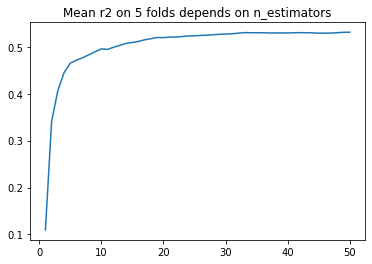

In [596]:
# Загрузите данные из файла abalone.csv. 
# Это датасет, в котором требуется предсказать возраст ракушки (число колец) по физическим измерениям.
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score


data6 = pd.read_csv(r'C:\Users\snkna\Downloads\abalone.csv')
# Преобразуйте признак Sex в числовой: значение F должно перейти в -1, I — в 0, M — в 1
data6['Sex'] = data6['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))
# Разделите содержимое файлов на признаки и целевую переменную. 
# В последнем столбце записана целевая переменная, в остальных — признаки
X = data6[data6.columns.drop('Rings')]
y = data6['Rings']

# Обучите случайный лес (sklearn.ensemble.RandomForestRegressor) с различным числом деревьев: 
# от 1 до 50 (не забудьте выставить "random_state=1" в конструкторе). 
# Для каждого из вариантов оцените качество работы полученного леса на кросс-валидации по 5 блокам. 
# Используйте параметры "random_state=1" и "shuffle=True" при создании генератора кросс-валидации sklearn.cross_validation.KFold. 
# В качестве меры качества воспользуйтесь коэффициентом детерминации (sklearn.metrics.r2_score).
scores = []
for k in  range(1,51):
    clf = RandomForestRegressor(random_state=1,n_estimators=k)
    kf = KFold(n_splits=5,shuffle=True,random_state=1)
    scores.append(cross_val_score(clf, X, y, cv=kf, scoring='r2').mean())
    
#Определите, при каком минимальном количестве деревьев случайный лес показывает качество на кросс-валидации выше 0.52. 
#Это количество и будет ответом на задание.
    
k=1
for i in scores:
    k+=1
    if i>=0.52:
        break
print(k)
with open("statement_forest.1.txt", "w") as file:
    file.write("%d" % k)
    
plt.plot(range(1,51),[score for score in scores])
plt.title('Mean r2 on 5 folds depends on n_estimators')
plt.show()

#### Задача 2

Min @test:
[(1, 0.5822942594278475)]
Min @test:
[(7, 0.5584259973942154)]
Min @test:
[(11, 0.5432835808866866)]
Min @test:
[(37, 0.5301645204906471)]
Min @test:
[(52, 0.5259049090698129)]
0.5410941951182815


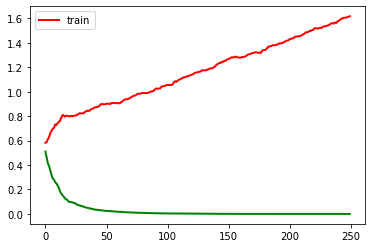

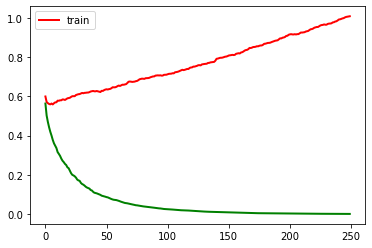

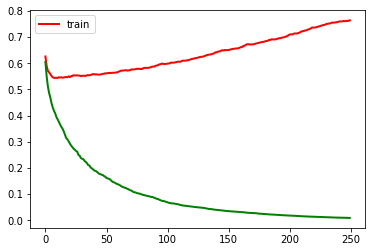

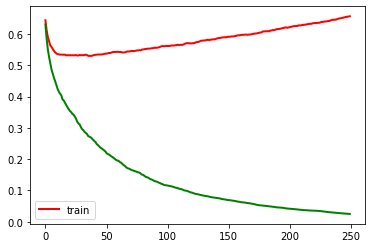

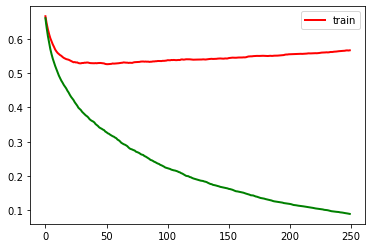

In [659]:
# Загрузите выборку из файла gbm-data.csv с помощью pandas и преобразуйте ее в массив numpy (параметр values у датафрейма). 
# В первой колонке файла с данными записано, была или нет реакция. 
# Все остальные колонки (d1 - d1776) содержат различные характеристики молекулы, такие как размер, форма и т.д. 
# Разбейте выборку на обучающую и тестовую, используя функцию train_test_split с параметрами test_size = 0.8 и random_state = 241.

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split


data_62 = pd.read_csv(r'C:\Users\snkna\Downloads\gbm-data.csv')
X = data_62.values[:,1:]
y = data_62.values[:,0]
# Разбейте выборку на обучающую и тестовую, используя функцию train_test_split с параметрами test_size = 0.8 и random_state = 241
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8,random_state=241)
# Обучите GradientBoostingClassifier с параметрами n_estimators=250, verbose=True, random_state=241 
# для каждого значения learning_rate из списка [1, 0.5, 0.3, 0.2, 0.1]
learning_rate_list = [1, 0.5, 0.3, 0.2, 0.1]
for i in learning_rate_list:
    clf = GradientBoostingClassifier(learning_rate = i,random_state=241,n_estimators=250)
    clf.fit(X_train, y_train)
    scores_train = []
    # Используйте метод staged_decision_function для предсказания качества на обучающей и тестовой выборке на каждой итерации.
    # staged_decision_function для заданной выборки он возвращает на каждой итерации
    for x in clf.staged_decision_function(X_train):
        scores_train.append(log_loss(y_train, [1.0 / (1.0 + math.exp(-i)) for i in x]))
    scores_test = []
    for x in clf.staged_decision_function(X_test):
        scores_test.append(log_loss(y_test, [1.0 / (1.0 + math.exp(-i)) for i in x]))
    print('Min @test:'),
    min_loss = min(scores_test)
    min_iter_score = [tuple_ for tuple_ in zip(range(1, len(scores_test)), scores_test) if tuple_[1] == min_loss]
    if i == 0.2:
        target_min_iter = min_iter_score[0][0]
        target_min_score = min_iter_score[0][1]
        with open("statement_gbm.2.txt", "w") as file:
            file.write("%.2f %d" % (min_iter_score[0][1],min_iter_score[0][0]))
    print(min_iter_score)
        
    plt.figure()
    plt.plot(scores_test, 'r', linewidth=2)
    plt.plot(scores_train, 'g', linewidth=2)
    plt.legend([ 'train'])
    
# На этих же данных обучите RandomForestClassifier с количеством деревьев, равным количеству итераций, 
# на котором достигается наилучшее качество у градиентного бустинга из предыдущего пункта, c random_state=241 
# и остальными параметрами по умолчанию. Какое значение log-loss на тесте получается у этого случайного леса? 
# (Не забывайте, что предсказания нужно получать с помощью функции predict_proba. 
# В данном случае брать сигмоиду от оценки вероятности класса не нужно)
    
from sklearn.ensemble import  RandomForestClassifier

clf2 = RandomForestClassifier(n_estimators=target_min_iter, random_state=241)
clf2.fit(X_train, y_train)
print(log_loss(y_test,clf2.predict_proba(X_test)))

with open("statement_gbm.3.txt", "w") as file:
    file.write("%.2f" % log_loss(y_test,clf2.predict_proba(X_test)))

# Как можно охарактеризовать график качества на тестовой выборке, начиная с некоторой итерации: 
# переобучение (overfitting) или недообучение (underfitting)? В ответе укажите одно из слов overfitting либо underfitting
with open("statement_gbm.1.txt", "w") as file:
    file.write("%s" % 'overfitting')

# Неделя 6 Кластеризация и визуализация
#### Задача 1

Размер матрицы признаков rgb исходного изображения: 474 713 3


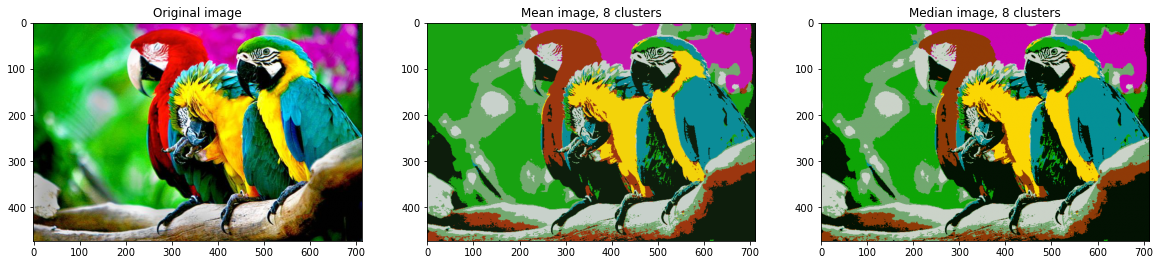

PSNR (mean): 18.436728778310275
PSNR (median): 18.146655471791103


In [797]:
from skimage.io import imread
from sklearn.cluster import KMeans
from skimage import img_as_float

# Загрузите parrots.jpg. Преобразуйте, приведя все значения в интервал от 0 до 1 (img_as_float из модуля skimage).
image = img_as_float(imread(r'C:\Users\snkna\OneDrive\Desktop\parrots.jpg'))
# Создайте матрицу объекты-признаки: характеризуйте каждый пиксель тремя координатами - значениями 
# интенсивности в пространстве RGB.
x, y, z = image.shape
print('Размер матрицы признаков rgb исходного изображения:',x, y, z)
fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 3, 1)
ax.title.set_text("Original image")
plt.imshow(image)
features = np.reshape(image, (x * y, z))
pixels = pd.DataFrame(np.reshape(image, (x * y, z)), columns=["R", "G", "B"])


# Запустите алгоритм K-Means с параметрами init='k-means++' и random_state=241. 
kmeans = KMeans( init='k-means++', random_state=241)
kmeans.fit_predict(features)
labels = kmeans.labels_
pixels["cluster"] = kmeans.fit_predict(pixels)
colors_avg = kmeans.cluster_centers_

# После выделения кластеров все пиксели, отнесенные в один кластер, попробуйте заполнить двумя способами: медианным и средним цветом по кластеру.
img_new = np.copy(features)
img_new2 = np.copy(features)
n_clusters = kmeans.n_clusters
for i in range(n_clusters):
    img_new[kmeans.labels_==i] = np.mean(features[labels==i],axis=0)
    img_new2[kmeans.labels_==i] = np.median(features[labels==i],axis=0)
    
ax = fig.add_subplot(1, 3, 2)
ax.title.set_text('Mean image, {} clusters'.format(n_clusters))
plt.imshow(img_new.reshape(x,y,z))

ax = fig.add_subplot(1, 3, 3)
ax.title.set_text('Median image, {} clusters'.format(n_clusters))
plt.imshow(img_new2.reshape(x,y,z))
plt.show()

# Измерьте качество получившейся сегментации с помощью метрики PSNR. Эту метрику нужно реализовать самостоятельно
def psnr(image1: np.array, image2: np.array):
    mse = np.mean((image1 - image2) ** 2)
    return 10.0 * np.log10(1.0 / mse)
print("PSNR (mean):",psnr(features, img_new))
print("PSNR (median):",psnr(features, img_new2))

Clustering: 1


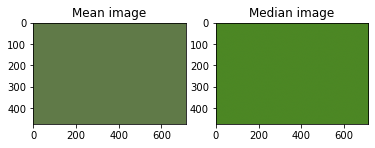

Clustering: 2


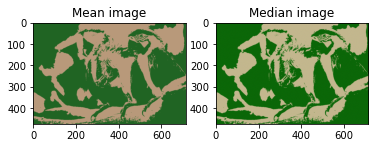

Clustering: 3


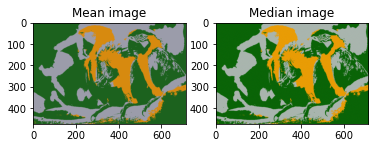

Clustering: 4


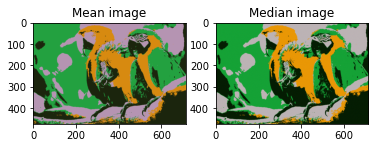

Clustering: 5


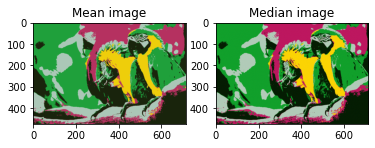

Clustering: 6


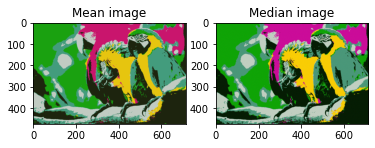

Clustering: 7


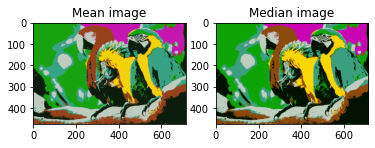

Clustering: 8


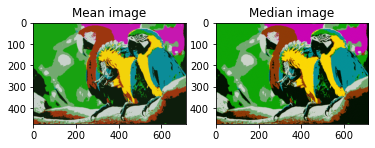

Clustering: 9


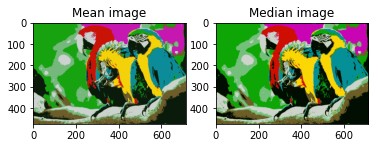

Clustering: 10


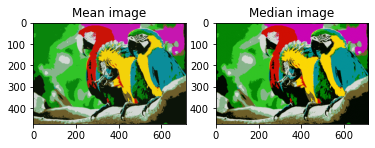

Clustering: 11


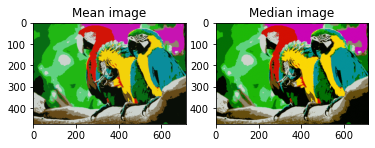

PSNR (mean): 20.13
PSNR (median): 19.85


11


In [787]:
# Найдите минимальное количество кластеров, при котором значение PSNR выше 20 
# (можно рассмотреть не более 20 кластеров, но не забудьте рассмотреть оба способа заполнения пикселей одного кластера).
for i in range(1,21):
    print(f"Clustering: {i}")
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=241)
    kmeans.fit_predict(features)
    labels = kmeans.labels_
    img_new = np.copy(features)
    img_new2 = np.copy(features)
    for j in range(kmeans.n_clusters):
        img_new[kmeans.labels_==j] = np.mean(features[labels==j],axis=0)
        img_new2[kmeans.labels_==j] = np.median(features[labels==j],axis=0)

    fig=plt.figure()
    ax = fig.add_subplot(1, 2, 1)
    ax.title.set_text("Mean image")
    plt.imshow(img_new.reshape(x,y,z))
    ax = fig.add_subplot(1, 2, 2)
    ax.title.set_text("Median image")
    plt.imshow(img_new2.reshape(x,y,z))    
    plt.show()
    
    if psnr(features, img_new) >20 or psnr(features, img_new2)>20:
        print(f"PSNR (mean): {psnr(features, img_new):.2f}\nPSNR (median): {psnr(features, img_new2):.2f}\n\n")
        print(i)
        with open("statement_clustering.1.txt", "w") as file:
            file.write("%d" % i)
        break